In [11]:
# CUSTOMER CHURN PREDICTION

''' Develop a model to predict customer churn for a subscription
based service or business. Use historical customer data, including
 features like usage behavior and customer demographics, and try
 algorithms like Logistic Regression, Random Forests, or Gradient
 Boosting to predict churn.'''

' Develop a model to predict customer churn for a subscription\nbased service or business. Use historical customer data, including\n features like usage behavior and customer demographics, and try\n algorithms like Logistic Regression, Random Forests, or Gradient\n Boosting to predict churn.'

In [12]:
''' 
My Objejctives
1.Encoding of 2 object columns 
2.split data
3.Feature Scaling(Scaling and Standarisataion of data)
4.Trying differtent models(like RandomForest , XGBoost etc to train our model )
5.Cheacking Model Accuracy and precision
6.Final impementation (ie. Visulaising)
'''

import pandas as pd 

df = pd.read_csv(r"C:\Users\shima\Downloads\Compressed\Customer_churn\Churn_Modelling.csv")

print("The customer Churn Data is given below :\n")
display(df)

The customer Churn Data is given below :



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
# Dropping usless column

df.drop(['RowNumber' , 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)

print("The new Data Frame is as follows : \n")
display(df)
df.info()

The new Data Frame is as follows : 



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
#Encoding 

from sklearn.preprocessing import OneHotEncoder

Encoded_df = pd.get_dummies(df , columns=[ 'Gender','Geography'] , drop_first=True )

print("The Dataset After Encoding :\n")
display(Encoded_df)


The Dataset After Encoding :



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,True,False


In [6]:
#spliting

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = Encoded_df.drop(['Exited'], axis=1) 
y = Encoded_df['Exited'] 


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


#Scaling
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] 


scaler = StandardScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


print("\nScaled Data :")
display(X_train.head())


Scaled Data :


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
9254,0.356500,-0.655786,0.345680,-1.218471,0.808436,1,1,1.367670,True,False,False
1561,-0.203898,0.294938,-0.348369,0.696838,0.808436,1,1,1.661254,True,True,False
1670,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,1,0,-0.252807,True,False,True
6087,-0.940717,-1.131148,1.386753,0.953212,-0.916688,1,0,0.915393,False,False,False
6669,-1.397337,1.625953,1.386753,1.057449,-0.916688,0,0,-1.059600,True,False,False


In [7]:
#Implemnting LogisticeRegression for predicting output

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , precision_score ,confusion_matrix , f1_score , recall_score

model = LogisticRegression()

model.fit(X_train , y_train)
y_predict = model.predict(X_test)

#Checking model performance
Accuracy = accuracy_score(y_test , y_predict)
Precision = precision_score(y_test, y_predict)
confusion = confusion_matrix(y_test , y_predict)
f1 = f1_score(y_test , y_predict)
recall = recall_score(y_test , y_predict)

print(f"Accuracy of the model is : {Accuracy * 100:.2f}% ")  
print("Precision of the model is : ",Precision)
print("Confusion Matrix of the model is :\n" , confusion)
print("\nF1 Score of the model is :",f1)          #ideal >0.70
print("Recall Score of the model is :" , recall)  #Recall Ideal if  > 0.75






Accuracy of the model is : 81.15% 
Precision of the model is :  0.5563380281690141
Confusion Matrix of the model is :
 [[1544   63]
 [ 314   79]]

F1 Score of the model is : 0.2953271028037383
Recall Score of the model is : 0.2010178117048346


In [8]:
#For more perfection implementing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

Random = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
Random.fit(X_train , y_train)
y_predict = Random.predict(X_test)

#Checking model performance
Accuracy = accuracy_score(y_test , y_predict)
Precision = precision_score(y_test, y_predict)
confusion = confusion_matrix(y_test , y_predict)
f1 = f1_score(y_test , y_predict)
recall = recall_score(y_test , y_predict)

print(f"Accuracy of the model is : {Accuracy * 100:.2f}% ")  
print("Precision of the model is : ",Precision)
print("Confusion Matrix of the model is :\n" , confusion)
print("\nF1 Score of the model is :",f1)          #ideal >0.70
print("Recall Score of the model is :" , recall)  #Recall Ideal if  > 0.75



Accuracy of the model is : 86.50% 
Precision of the model is :  0.7639484978540773
Confusion Matrix of the model is :
 [[1552   55]
 [ 215  178]]

F1 Score of the model is : 0.5686900958466453
Recall Score of the model is : 0.4529262086513995


In [9]:
import numpy as np
import xgboost as xgb

neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

pos_scale = neg / pos

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, scale_pos_weight = pos_scale, eval_metric='logloss' )

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


Accuracy = accuracy_score(y_test , y_pred)
Precision = precision_score(y_test, y_pred)
confusion = confusion_matrix(y_test , y_pred)
f1 = f1_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)

print(f"Accuracy of the model is : {Accuracy * 100:.2f}% ")  
print("Precision of the model is : ",Precision)
print("Confusion Matrix of the model is :\n" , confusion)
print("\nF1 Score of the model is :",f1)          #ideal >0.70
print("Recall Score of the model is :" , recall)  #Recall Ideal if  > 0.75



Accuracy of the model is : 84.10% 
Precision of the model is :  0.5850340136054422
Confusion Matrix of the model is :
 [[1424  183]
 [ 135  258]]

F1 Score of the model is : 0.6187050359712231
Recall Score of the model is : 0.6564885496183206


Top 10 Most Important Features for Churn Prediction:
NumOfProducts        0.307047
IsActiveMember       0.159045
Age                  0.123906
Geography_Germany    0.091736
Balance              0.063095
Gender_Male          0.059996
Geography_Spain      0.044315
CreditScore          0.040805
EstimatedSalary      0.040618
Tenure               0.036193
dtype: float32


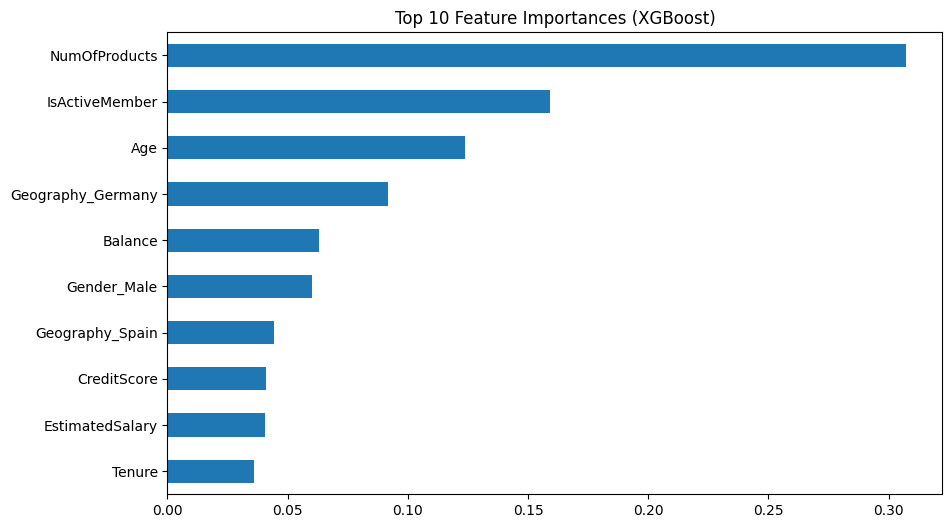

In [ ]:
# Final Implementation showing using matplotlib

import pandas as pd
import matplotlib.pyplot as plt

importance_scores = xgb_model.feature_importances_ #Extracting Importance of columns

features = X_train.columns
importance_series = pd.Series(importance_scores, index=features).sort_values(ascending=False)

print("Top 10 Most Important Features for Churn Prediction:")
print(importance_series.head(10))

plt.figure(figsize=(10, 6))
importance_series.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.gca().invert_yaxis()
plt.show()